# Big data Project: Operation on datasets



In [1]:
# import packages 
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier


<a id='wrangling'></a>
## Data descriptive analysis




 



Now we will gather and collect data from CSV files 

In [2]:
# Load Data that I will investigate it

df_match = pd.read_csv(r'Match.csv',delimiter=',')
df_player_attribute = pd.read_csv(r'Player_Attributes.csv',delimiter=',')
df_team_attribute = pd.read_csv(r'Team_Attributes.csv',delimiter=',')
df_team = pd.read_csv(r'Team.csv',delimiter=',')
df_player = pd.read_csv(r'Player.csv',delimiter=',')
df_country = pd.read_csv(r'Country.csv',delimiter=',')
df_league = pd.read_csv(r'League.csv',delimiter=',')

In [3]:
#Sample of Mactch Table
df_match.head() 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,8/17/2008 0:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,8/16/2008 0:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,8/16/2008 0:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,8/17/2008 0:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,8/16/2008 0:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## Data overview

In [4]:
#summary about each dataset 
display(df_match.info(verbose=True))
display(df_player.info(verbose=True))
display(df_player_attribute.info(verbose=True))
display(df_team.info(verbose=True))
display(df_team_attribute.info(verbose=True))
display(df_country.info(verbose=True))
display(df_league.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                int64  
 1    country_id        int64  
 2    league_id         int64  
 3    season            object 
 4    stage             int64  
 5    date              object 
 6    match_api_id      int64  
 7    home_team_api_id  int64  
 8    away_team_api_id  int64  
 9    home_team_goal    int64  
 10   away_team_goal    int64  
 11   home_player_X1    float64
 12   home_player_X2    float64
 13   home_player_X3    float64
 14   home_player_X4    float64
 15   home_player_X5    float64
 16   home_player_X6    float64
 17   home_player_X7    float64
 18   home_player_X8    float64
 19   home_player_X9    float64
 20   home_player_X10   float64
 21   home_player_X11   float64
 22   away_player_X1    float64
 23   away_player_X2    float64
 24   away_player_X3    float64
 25   away_player_X4    fl

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  177109 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


None

In [5]:
# Number of Rows, Columns
df_match.shape 

(25979, 115)

In [6]:
# information about Match table 
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [7]:
# Number of Duplicated Records in Match table
df_match.duplicated().sum()

np.int64(0)

In [8]:
# Number of NULL values in Match table
df_match.isna().sum().sum()

np.int64(407395)

In [9]:
#Data summary 
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [10]:
#Sample of Country Table
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [11]:
# Number of Rows, Columns
df_country.shape

(11, 2)

In [12]:
# information about country table 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


In [13]:

df_country.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


In [14]:
#Sample of team Table
df_team.head() 

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
# Number of Rows, Columns
df_team.shape

(299, 5)

In [16]:
# information about team table 
df_team.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [17]:
# Number of Duplicated Records team table
df_team.duplicated().sum()

np.int64(0)

In [18]:
# Number of NULL values in each table in team table
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [19]:
# Number of NULL values in team table 
df_team.isna().sum().sum()

np.int64(11)

In [20]:
df_team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [21]:
#Sample of team attribute Table
df_team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [22]:
# Number of Rows, Columns
df_team_attribute.shape

(1458, 25)

In [23]:
# information about team attribute table 
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [24]:
# Number of Duplicated Records team attribute table
df_team_attribute.duplicated().sum()

np.int64(0)

In [25]:
# Number of NULL values in each table in team attribute table
df_team_attribute.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [26]:
# Number of NULL values in team attribute table 
df_team_attribute.isna().sum().sum()

np.int64(969)

In [27]:
df_team_attribute.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [28]:
#Sample of league Table
df_league 

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [29]:
# Number of Rows, Columns
df_league.shape

(11, 3)

In [30]:
# information about league table 
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


In [31]:
df_league.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [32]:
#Sample of player Table
df_player.head() 

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [33]:
# Number of Rows, Columns
df_player.shape

(11060, 7)

In [34]:
# Number of Rows, Columns
df_player.duplicated().sum()

np.int64(0)

In [35]:
# Number of NULL values in team table
df_player.isna().sum().sum()

np.int64(0)

In [36]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [37]:
#Sample of player attribute Table
df_player_attribute.head()  

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [38]:
# Number of Rows, Columns
df_player_attribute.shape

(183978, 42)

In [39]:
# information about player attribute table 
df_player_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  177109 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [40]:
# Number of Duplicated Records player attribute table
df_player_attribute.duplicated().sum()

np.int64(0)

In [41]:
# Number of NULL values in each columns in _player attribute table
df_player_attribute.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [42]:
# Number of NULL values in player attribute table
df_player_attribute.isna().sum().sum()

np.int64(50940)

In [43]:
df_player_attribute.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<a id='limitations'></a>
## Limitations 



>I Noted that some players table are missing from the information of table (missed values). 

> Noted that some Match table are missing from the information of table (missed values)

>The players' name  are duplicated and incomplete so some results aren't accurated and I looking for the full names to disable matching result


>All Date in dataset come as string so I converted it to datetime

>Most of the Challenges in missed values and duplicated records


<a id='SEC 2'></a>
## SEC2



In [44]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,8/17/2008 0:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,8/16/2008 0:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,8/16/2008 0:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,8/17/2008 0:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,8/16/2008 0:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [45]:
# drob the columns that we don't need in analysis after the away_team_goal
# Select columns which we need in analysis
df_match=df_match.loc[:,:'away_team_goal'] 
df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,8/17/2008 0:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,8/16/2008 0:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,8/16/2008 0:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,8/17/2008 0:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,8/16/2008 0:00,492477,7947,9985,1,3


In [46]:
#Convert Date to DateTime type to gain availability to dedicate a year of each date
df_match['date'] = pd.to_datetime(df_match['date'])
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [47]:
# merging team table with match table by inner join type
# this to add the home team name to the match table
df_match = df_match.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1,9987,673.0,KRC Genk,GEN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,3,10000,15005.0,SV Zulte-Waregem,ZUL
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,5,9984,1750.0,KSV Cercle Brugge,CEB
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,7,9991,674.0,KAA Gent,GEN
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9,7947,NaN,FCV Dender EH,DEN


In [48]:
# rename column: team_long_name to home_team_name 
df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,team_api_id,team_fifa_api_id,home_team_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1,9987,673.0,KRC Genk,GEN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,3,10000,15005.0,SV Zulte-Waregem,ZUL
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,5,9984,1750.0,KSV Cercle Brugge,CEB
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,7,9991,674.0,KAA Gent,GEN
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9,7947,NaN,FCV Dender EH,DEN


In [49]:
# drop column team_api_id and id from team table 
df_match.drop(columns=['team_api_id','id_y','id_x','stage'], axis=1, inplace=True)
df_match.head()


,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_fifa_api_id,home_team_name,team_short_name
0,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,673.0,KRC Genk,GEN
1,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0,15005.0,SV Zulte-Waregem,ZUL
2,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3,1750.0,KSV Cercle Brugge,CEB
3,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0,674.0,KAA Gent,GEN
4,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3,NaN,FCV Dender EH,DEN


In [50]:
# this to add the away team name to the match table
# Step 1: Merge to add away team name from df_team
df_match = df_match.merge(df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')
# Step 2: Rename column for away team name
df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)
df_match.head()

,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_fifa_api_id_x,home_team_name,team_short_name_x,id,team_api_id,team_fifa_api_id_y,away_team_name,team_short_name_y
0,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0,15005.0,SV Zulte-Waregem,ZUL,4,9994,2007.0,Sporting Lokeren,LOK
2,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3,1750.0,KSV Cercle Brugge,CEB,6,8635,229.0,RSC Anderlecht,AND
3,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0,674.0,KAA Gent,GEN,8,9998,1747.0,RAEC Mons,MON
4,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3,NaN,FCV Dender EH,DEN,10,9985,232.0,Standard de Liège,STL


In [51]:
### drop column
# drop column 
df_match.drop(columns=['team_fifa_api_id_x','team_short_name_x','id','team_api_id','team_fifa_api_id_y','team_short_name_y'], axis=1, inplace=True)
df_match.head()

,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,KRC Genk,Beerschot AC
1,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren
2,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht
3,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0,KAA Gent,RAEC Mons
4,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3,FCV Dender EH,Standard de Liège


In [52]:
# this to add the attributes of the home team to the match table

# Step 1: Sort the team attributes by team ID and date in descending order
df_team_attribute = df_team_attribute.sort_values(by=['team_api_id', 'date'], ascending=[True, False])

# Step 2: Merge the team attributes with the match data
df_team_attribute_latest_home = (
    df_team_attribute.merge(df_match[['date', 'home_team_api_id']], how='inner', left_on='team_api_id', right_on='home_team_api_id'))# Include match date and home team ID

In [53]:
# Step 3: Filter attributes to include only those before or on the match date
df_team_attribute_latest_home = (df_team_attribute_latest_home[df_team_attribute_latest_home['date_x'] <= df_team_attribute_latest_home['date_y']].sort_values(by=['home_team_api_id', 'date_y', 'date_x'], ascending=[True, True, False]) .drop_duplicates(subset=['home_team_api_id', 'date_y'])) # Keep the latest attributes before each match + # Sort by team and dates

# Step 4: Rename columns to avoid confusion
df_team_attribute_latest_home = df_team_attribute_latest_home.rename(columns={'date_x': 'attribute_date', 'date_y': 'match_date'})

df_team_attribute_latest_home.head()

,id,team_fifa_api_id,team_api_id,attribute_date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date,home_team_api_id
619,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-03-06,1601
621,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-03-19,1601
622,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-03,1601
623,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-20,1601
624,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-28,1601


In [54]:
# Step 6: Merge the filtered attributes back into the match data
df_match = df_match.merge(df_team_attribute_latest_home, how='inner', left_on=['home_team_api_id', 'date'], right_on=['team_api_id', 'match_date'])

df_match.head()

,country_id,league_id,season,date,match_api_id,home_team_api_id_x,away_team_api_id,home_team_goal,away_team_goal,home_team_name,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date,home_team_api_id_y
0,1,1,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,...,Organised,65,Medium,60,Press,70,Wide,Cover,2010-02-24,9984
1,1,1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,...,Organised,70,High,70,Double,70,Wide,Cover,2010-03-10,9986
2,1,1,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,...,Organised,65,Medium,70,Double,70,Wide,Cover,2010-02-24,9999
3,1,1,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,...,Organised,70,High,70,Double,70,Wide,Cover,2010-03-06,9986
4,1,1,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,...,Organised,65,Medium,60,Press,70,Wide,Cover,2010-03-06,9984


In [55]:
df_match.rename(columns={'home_team_api_id_x': 'home_team_api_id'}, inplace=True)

# List of yellow-highlighted columns to drop
columns_to_drop = ['country_id','league_id', 'team_fifa_api_id','home_team_api_id_y','team_api_id']

# Drop the columns from the DataFrame
df_match = df_match.drop(columns=columns_to_drop)
df_match.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,id,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,295,...,Normal,Organised,65,Medium,60,Press,70,Wide,Cover,2010-02-24
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,1188,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010-03-10
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,1103,...,Normal,Organised,65,Medium,70,Double,70,Wide,Cover,2010-02-24
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,1188,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010-03-06
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,295,...,Normal,Organised,65,Medium,60,Press,70,Wide,Cover,2010-03-06


In [56]:
# # Identify columns from 'team_api_id' onward
home_columns = df_match.loc[:, 'id':].columns

# Rename all columns, including 'team_api_id', by adding the 'home_' prefix
df_match.rename(columns={col: f'home_{col}' for col in home_columns}, inplace=True)
#drop id
df_match.drop(columns=['home_id'], inplace=True)
df_match.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,home_attribute_date,...,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,home_match_date
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,2010-02-22 00:00:00,...,Normal,Organised,65,Medium,60,Press,70,Wide,Cover,2010-02-24
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,2010-02-22 00:00:00,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010-03-10
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,2010-02-22 00:00:00,...,Normal,Organised,65,Medium,70,Double,70,Wide,Cover,2010-02-24
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,2010-02-22 00:00:00,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010-03-06
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,2010-02-22 00:00:00,...,Normal,Organised,65,Medium,60,Press,70,Wide,Cover,2010-03-06


In [57]:
# this to add the attributes of the away team to the match table
# Step 1: Sort the team attributes by team ID and date in descending order
df_team_attribute = df_team_attribute.sort_values(by=['team_api_id', 'date'], ascending=[True, False])

# Step 2: Merge the team attributes with the match data for the away team
df_team_attribute_latest_away = (
    df_team_attribute.merge(df_match[['date', 'away_team_api_id']],how='inner', left_on='team_api_id', right_on='away_team_api_id'))# Include match date and away team ID

In [58]:
# Step 3: Filter attributes to include only those before or on the match date
df_team_attribute_latest_away = (
    df_team_attribute_latest_away[df_team_attribute_latest_away['date_x'] <= df_team_attribute_latest_away['date_y']].sort_values(by=['away_team_api_id', 'date_y', 'date_x'], ascending=[True, True, False])  .drop_duplicates(subset=['away_team_api_id', 'date_y']))  # Keep the latest attributes before each match + # Sort by team and dates

# Step 4: Rename columns to avoid confusion
df_team_attribute_latest_away = df_team_attribute_latest_away.rename(columns={'date_x': 'attribute_date', 'date_y': 'match_date'})

df_team_attribute_latest_home.head()

,id,team_fifa_api_id,team_api_id,attribute_date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date,home_team_api_id
619,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-03-06,1601
621,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-03-19,1601
622,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-03,1601
623,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-20,1601
624,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,Organised,65,Medium,60,Press,50,Normal,Cover,2010-04-28,1601


In [59]:
# Step 6: Merge the filtered away team attributes back into the match data
df_match = df_match.merge(df_team_attribute_latest_away, how='inner', left_on=['away_team_api_id', 'date'], right_on=['team_api_id', 'match_date'])
df_match.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id_x,home_team_goal,away_team_goal,home_team_name,away_team_name,home_attribute_date,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date,away_team_api_id_y
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,2010-02-22 00:00:00,...,Organised,70,High,70,Double,70,Wide,Cover,2010-02-24,9986
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,2010-02-22 00:00:00,...,Organised,65,Medium,65,Press,70,Wide,Cover,2010-03-10,9994
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,2010-02-22 00:00:00,...,Organised,70,High,65,Press,70,Wide,Cover,2010-02-24,9987
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,2010-02-22 00:00:00,...,Organised,70,High,50,Press,70,Wide,Cover,2010-03-06,8635
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,2010-02-22 00:00:00,...,Organised,65,Medium,65,Press,70,Wide,Cover,2010-03-06,9994


In [60]:
df_match.rename(columns={'away_team_api_id_x': 'away_team_api_id'}, inplace=True)

# List of yellow-highlighted columns to drop
columns_to_drop = ['team_fifa_api_id','away_team_api_id_y','team_api_id']
# Drop the columns from the DataFrame
df_match = df_match.drop(columns=columns_to_drop)
df_match.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,home_attribute_date,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,match_date
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,2010-02-22 00:00:00,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010-02-24
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,2010-02-22 00:00:00,...,Normal,Organised,65,Medium,65,Press,70,Wide,Cover,2010-03-10
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,2010-02-22 00:00:00,...,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010-02-24
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,2010-02-22 00:00:00,...,Normal,Organised,70,High,50,Press,70,Wide,Cover,2010-03-06
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,2010-02-22 00:00:00,...,Normal,Organised,65,Medium,65,Press,70,Wide,Cover,2010-03-06


In [61]:
# # Identify columns from 'team_api_id' onward
home_columns = df_match.loc[:, 'id':].columns

# Rename all columns, including 'team_api_id', by adding the 'home_' prefix
df_match.rename(columns={col: f'away_{col}' for col in home_columns}, inplace=True)
#drop id
df_match.drop(columns=['away_id','home_match_date','away_match_date'], inplace=True)
df_match.head()

,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,home_attribute_date,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,2010-02-22 00:00:00,...,60,Normal,Organised,70,High,70,Double,70,Wide,Cover
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,2010-02-22 00:00:00,...,50,Normal,Organised,65,Medium,65,Press,70,Wide,Cover
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,2010-02-22 00:00:00,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,2010-02-22 00:00:00,...,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,2010-02-22 00:00:00,...,50,Normal,Organised,65,Medium,65,Press,70,Wide,Cover


In [62]:
# this will fit fix the date columns format
df_match['home_attribute_date'] = pd.to_datetime(df_match['home_attribute_date'])
df_match['away_attribute_date'] = pd.to_datetime(df_match['away_attribute_date'])
# this will drop that has null values in the columns
# List of yellow-highlighted columns to drop
columns_to_drop = ['home_buildUpPlayDribbling','away_buildUpPlayDribbling','home_buildUpPlayDribblingClass','away_buildUpPlayDribblingClass']
# Drop the columns from the DataFrame
df_match = df_match.drop(columns=columns_to_drop)
df_match.isnull().sum().sum()


np.int64(0)

In [63]:
# create a new column for the winner team
df_match['winner'] = np.where(df_match['home_team_goal'] > df_match['away_team_goal'], df_match['home_team_name'], df_match['away_team_name'])
# condition for draw match the winner is 'Draw'
df_match['winner'] = np.where(df_match['home_team_goal'] == df_match['away_team_goal'], 'Draw', df_match['winner'])

In [64]:
# Encode the 'winner' column based on match results
def encode_winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1  # Home team win
    elif row['home_team_goal'] < row['away_team_goal']:
        return -1  # Away team win
    else:
        return 0  # Draw

# Apply the function to create the 'winner_encoded' column
df_match['winner_encoded'] = df_match.apply(encode_winner, axis=1)

In [65]:
def get_last_matches(matches, date, team, x=10):
    ''' Get the last x matches of a given team. '''

    # Ensure consistent data types
    matches['home_team_api_id'] = matches['home_team_api_id'].astype('Int64')
    matches['away_team_api_id'] = matches['away_team_api_id'].astype('Int64')

    # Convert `team` to a scalar value if it's passed as a Series
    if isinstance(team, pd.Series):
        team = team.iloc[0]

    # Handle missing team ID
    if pd.isna(team):
        return pd.DataFrame()  # Return empty DataFrame if `team` is missing
    team = int(team)  # Ensure `team` is a scalar value

    # Filter team matches
    team_matches = matches[
        (matches['home_team_api_id'].notna() & (matches['home_team_api_id'] == team)) |
        (matches['away_team_api_id'].notna() & (matches['away_team_api_id'] == team))
    ]

    # Filter x last matches
    last_matches = (
        team_matches[team_matches['date'] < date]
        .sort_values(by='date', ascending=False)
        .iloc[:x, :]
    )

    return last_matches


    
def get_last_matches_against_eachother(matches, date, home_team, away_team, x = 10):
    ''' Get the last x matches of two given teams. '''
    
    #Find matches of both teams
    home_matches = matches[(matches['home_team_api_id'] == home_team) & (matches['away_team_api_id'] == away_team)]    
    away_matches = matches[(matches['home_team_api_id'] == away_team) & (matches['away_team_api_id'] == home_team)]  
    total_matches = pd.concat([home_matches, away_matches])
    
    #Get last x matches
    try:    
        last_matches = total_matches[total_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:x,:]
    except:
        last_matches = total_matches[total_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:total_matches.shape[0],:]
        
        #Check for error in data
        if(last_matches.shape[0] > x):
            print("Error in obtaining matches")
            
    #Return data
    return last_matches
    
def get_goals(matches, team):
    ''' Get the goals of a specfic team from a set of matches. '''
    
    #Find home and away goals
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())

    total_goals = home_goals + away_goals
    
    #Return total goals
    return total_goals

def get_goals_conceided(matches, team):
    ''' Get the goals conceided of a specfic team from a set of matches. '''

    #Find home and away goals
    home_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())

    total_goals = home_goals + away_goals

    #Return total goals
    return total_goals

def get_wins(matches, team):
    ''' Get the number of wins of a specfic team from a set of matches. '''
    
    #Find home and away wins
    home_wins = int(matches.home_team_goal[(matches.home_team_api_id == team) & (matches.home_team_goal > matches.away_team_goal)].count())
    away_wins = int(matches.away_team_goal[(matches.away_team_api_id == team) & (matches.away_team_goal > matches.home_team_goal)].count())

    total_wins = home_wins + away_wins

    #Return total wins
    return total_wins      
    
def get_match_features(match, matches, x=10):
    ''' Create match-specific features for a given match. '''

    # Define variables
    date = match['date']
    home_team = match['home_team_api_id']
    away_team = match['away_team_api_id']

    # Ensure scalar values for team IDs
    if isinstance(home_team, pd.Series):
        home_team = home_team.iloc[0]
    if isinstance(away_team, pd.Series):
        away_team = away_team.iloc[0]

    # Get last x matches of home and away teams
    matches_home_team = get_last_matches(matches, date, home_team, x=x)
    matches_away_team = get_last_matches(matches, date, away_team, x=x)

    # Get last x matches between the two teams
    last_matches_against = get_last_matches_against_eachother(matches, date, home_team, away_team, x=3)

    # Create goal variables
    home_goals = get_goals(matches_home_team, home_team)
    away_goals = get_goals(matches_away_team, away_team)
    home_goals_conceided = get_goals_conceided(matches_home_team, home_team)
    away_goals_conceided = get_goals_conceided(matches_away_team, away_team)

    # Define result DataFrame
    result = pd.DataFrame()

    # Define ID features
    result.loc[0, 'match_api_id'] = match['match_api_id']
    # result.loc[0, 'league_id'] = match['league_id']

    # Create match features
    result.loc[0, 'home_team_goals_difference'] = home_goals - home_goals_conceided
    result.loc[0, 'away_team_goals_difference'] = away_goals - away_goals_conceided
    result.loc[0, 'games_won_home_team'] = get_wins(matches_home_team, home_team)
    result.loc[0, 'games_won_away_team'] = get_wins(matches_away_team, away_team)
    result.loc[0, 'games_against_won'] = get_wins(last_matches_against, home_team)
    result.loc[0, 'games_against_lost'] = get_wins(last_matches_against, away_team)

    # Return match features
    return result.loc[0]


def create_feables(matches,horizontal = True, x = 10, verbose = True):
    ''' Create and aggregate features and labels for all matches. '''
        
    if verbose == True:
        print("Generating match features...")
    start = time.time()  # Use time.time() here
    
    #Get match features for all matches
    match_stats = matches.apply(lambda x: get_match_features(x, matches, x = 10), axis = 1)
    end = time.time()
    return match_stats

In [66]:
import time
# Remove duplicate columns if any
df_match = df_match.loc[:, ~df_match.columns.duplicated()]

feables = create_feables(df_match)
inputs = feables.drop('match_api_id', axis = 1)

#merge the data with the match data
df_match = df_match.merge(feables, on = 'match_api_id', how = 'left')
df_match.head()

Generating match features...


,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,home_attribute_date,...,away_defenceTeamWidthClass,away_defenceDefenderLineClass,winner,winner_encoded,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost
0,2009/2010,2010-02-24,665677,9984,9986,1,0,KSV Cercle Brugge,Sporting Charleroi,2010-02-22,...,Wide,Cover,KSV Cercle Brugge,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2009/2010,2010-03-10,665688,9986,9994,4,1,Sporting Charleroi,Sporting Lokeren,2010-02-22,...,Wide,Cover,Sporting Charleroi,1,-3.0,-3.0,0.0,1.0,0.0,0.0
2,2009/2010,2010-02-24,665694,9999,9987,1,1,KSV Roeselare,KRC Genk,2010-02-22,...,Wide,Cover,Draw,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009/2010,2010-03-06,665717,9986,8635,0,2,Sporting Charleroi,RSC Anderlecht,2010-02-22,...,Wide,Cover,RSC Anderlecht,-1,-1.0,1.0,0.0,1.0,0.0,0.0
4,2009/2010,2010-03-06,665719,9984,9994,4,0,KSV Cercle Brugge,Sporting Lokeren,2010-02-22,...,Wide,Cover,KSV Cercle Brugge,1,2.0,1.0,2.0,1.0,0.0,0.0


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19355 entries, 0 to 19354
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   season                               19355 non-null  object        
 1   date                                 19355 non-null  datetime64[ns]
 2   match_api_id                         19355 non-null  int64         
 3   home_team_api_id                     19355 non-null  Int64         
 4   away_team_api_id                     19355 non-null  Int64         
 5   home_team_goal                       19355 non-null  int64         
 6   away_team_goal                       19355 non-null  int64         
 7   home_team_name                       19355 non-null  object        
 8   away_team_name                       19355 non-null  object        
 9   home_attribute_date                  19355 non-null  datetime64[n

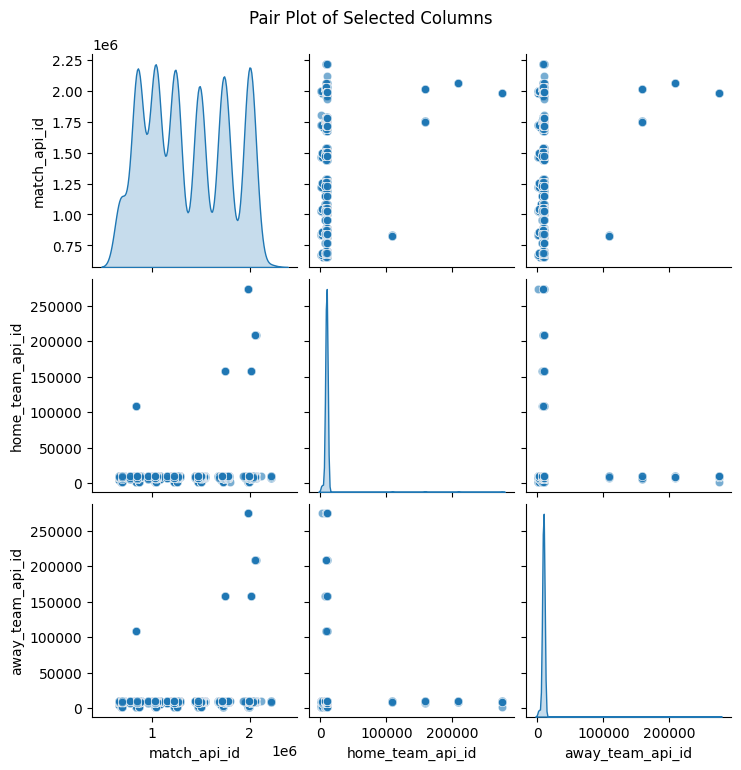

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


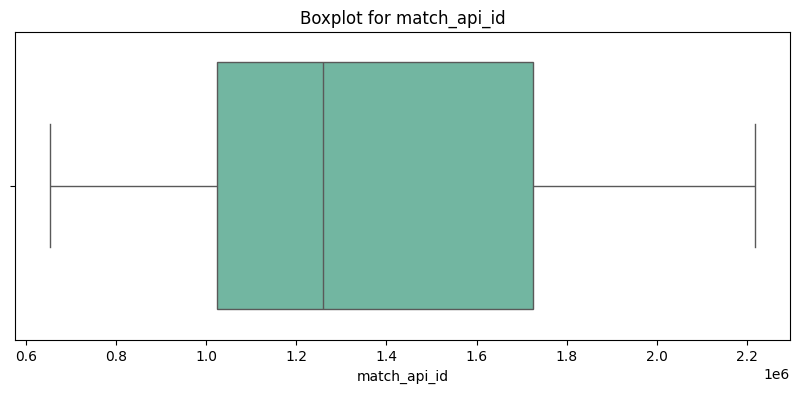

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


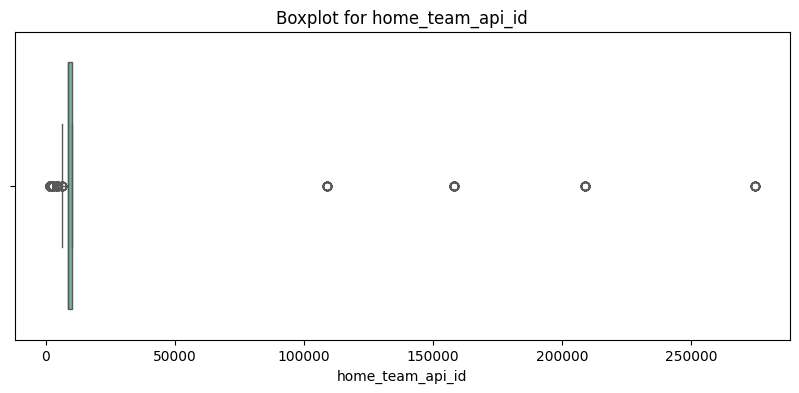

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


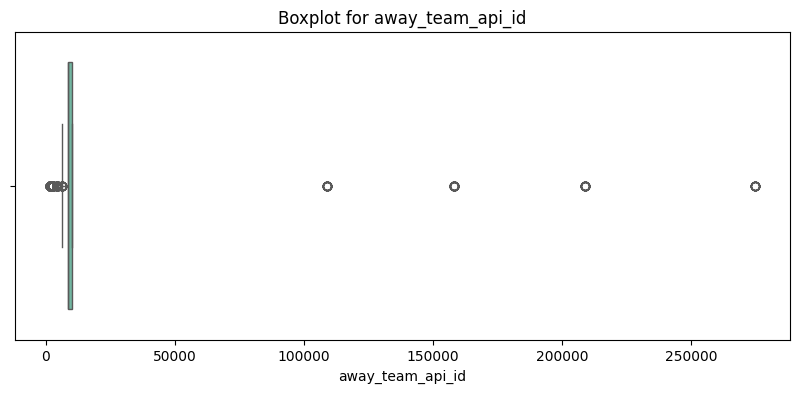

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


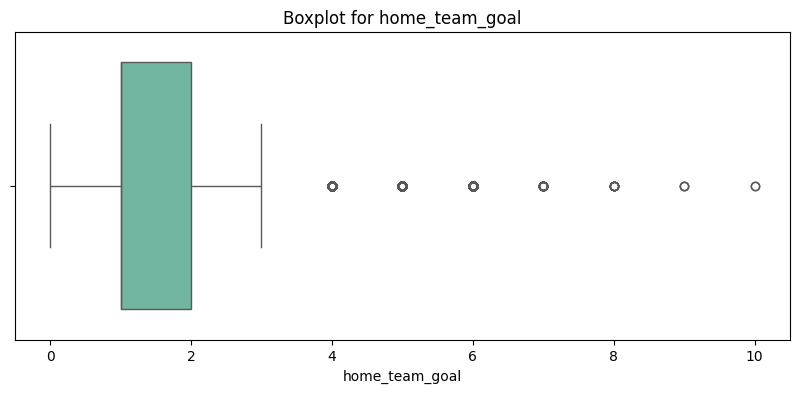

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


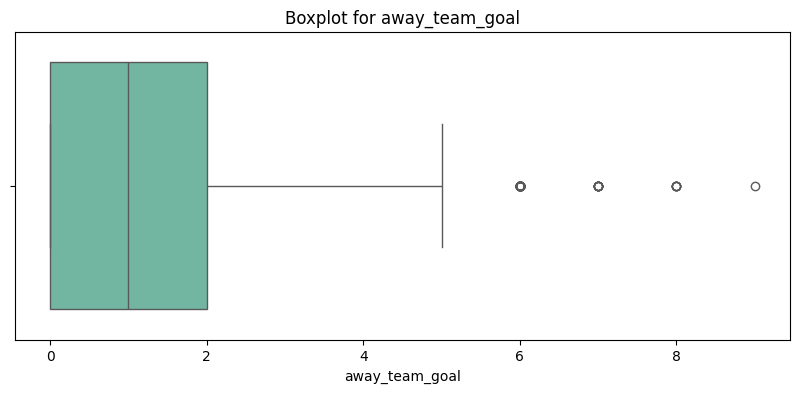

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


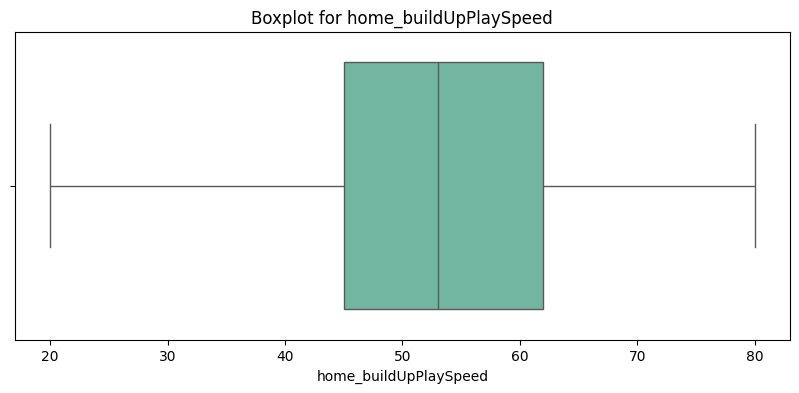

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


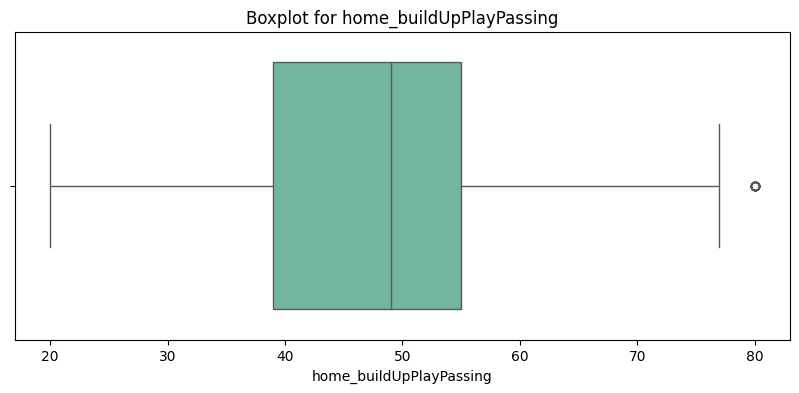

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


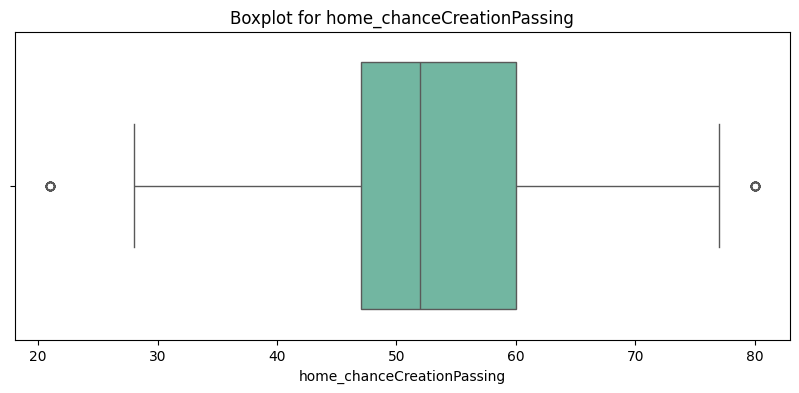

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


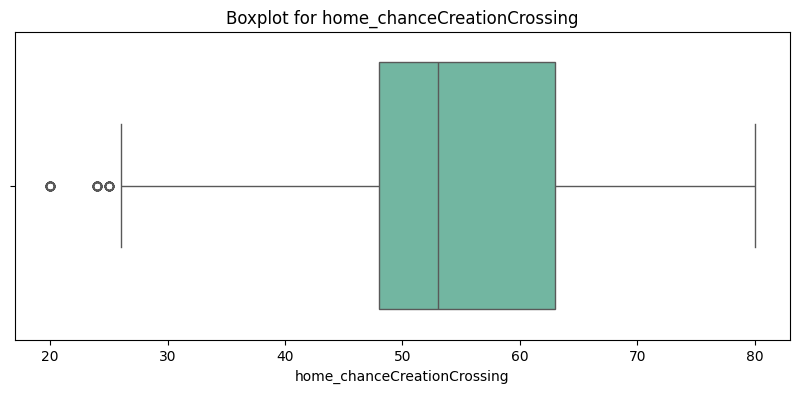

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


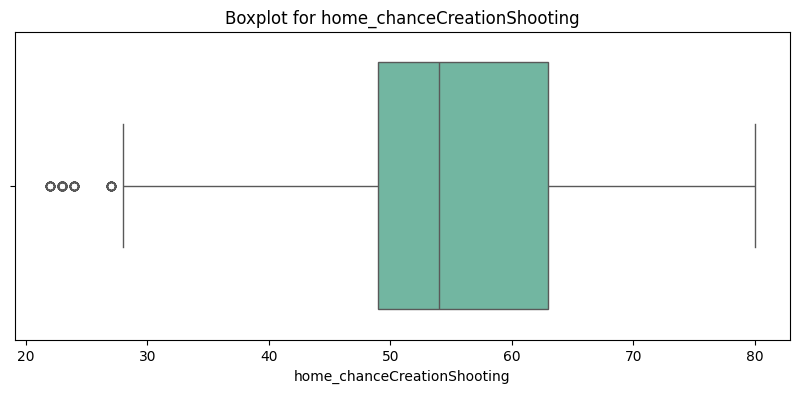

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


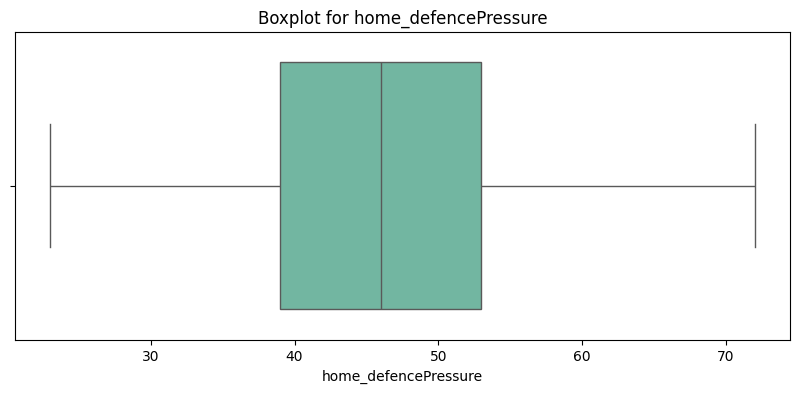

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


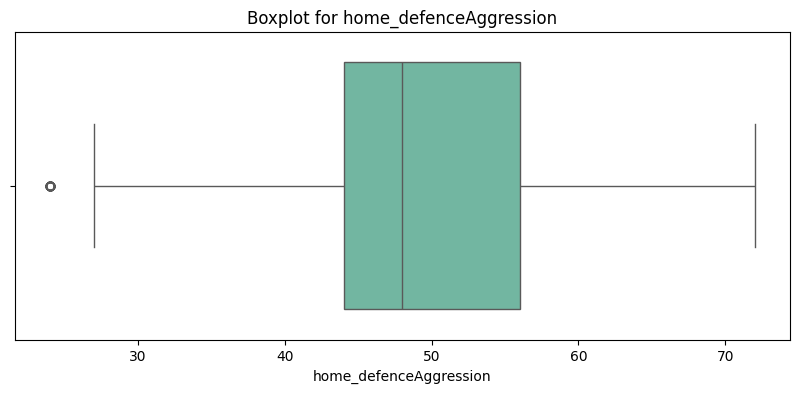

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


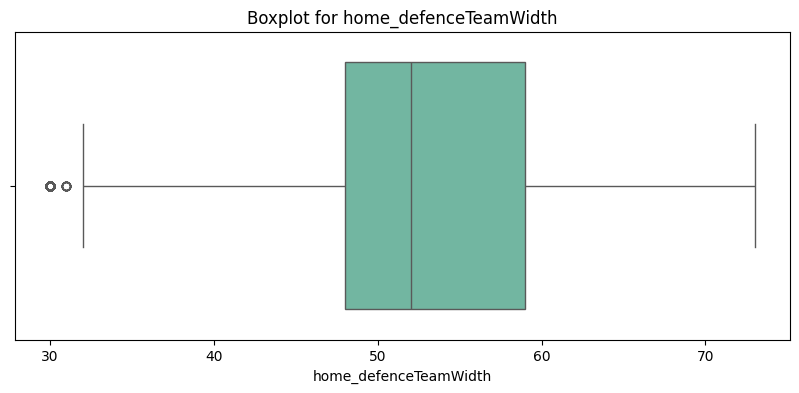

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


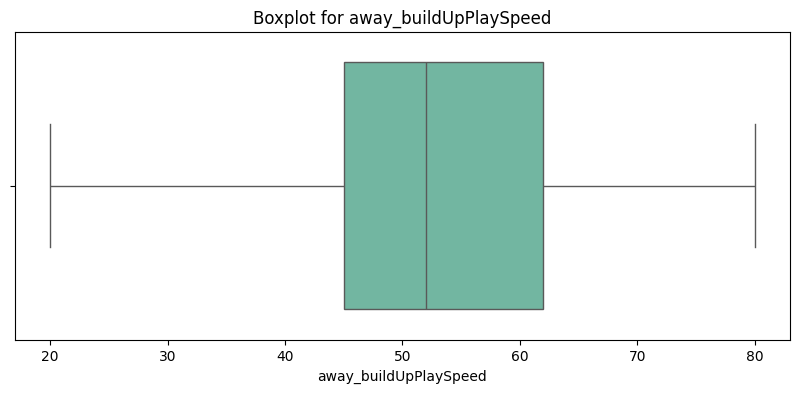

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


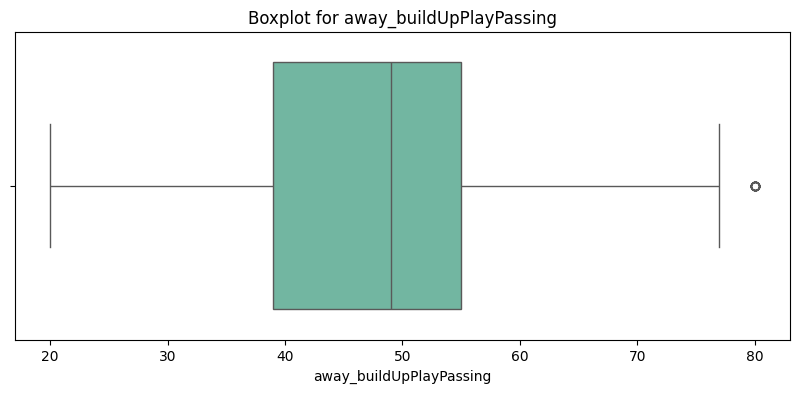

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


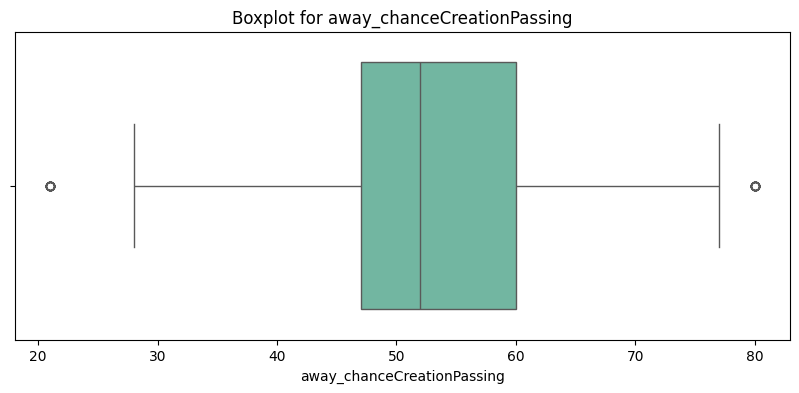

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


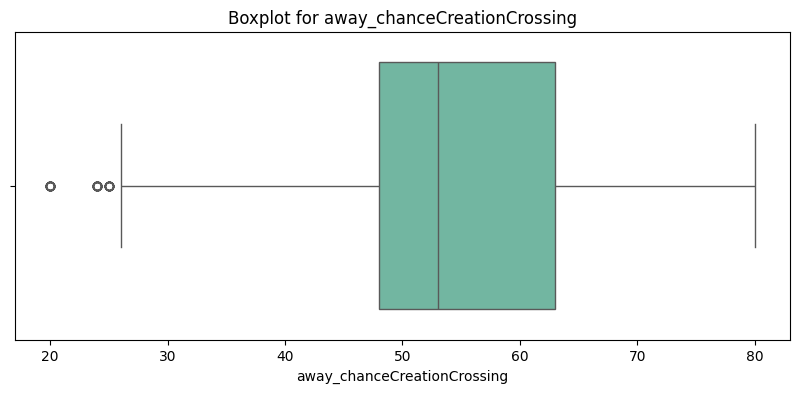

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


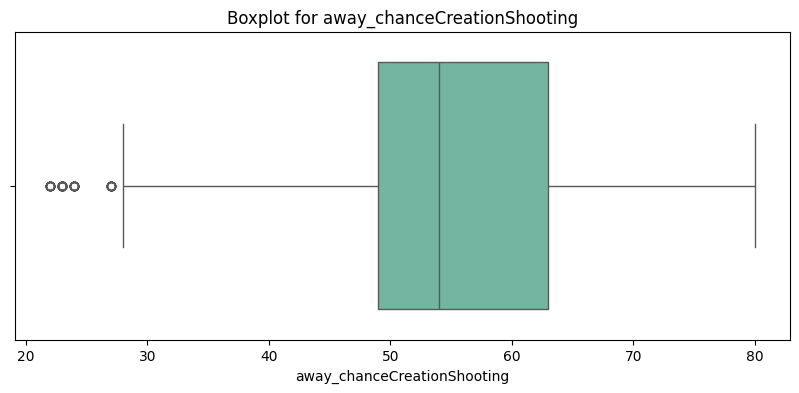

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


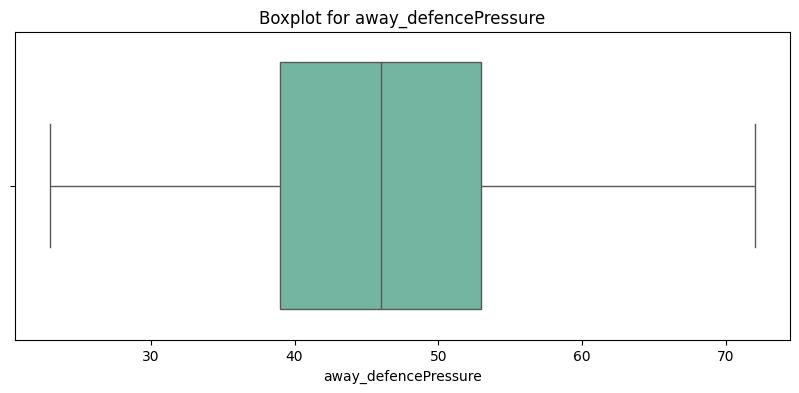

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


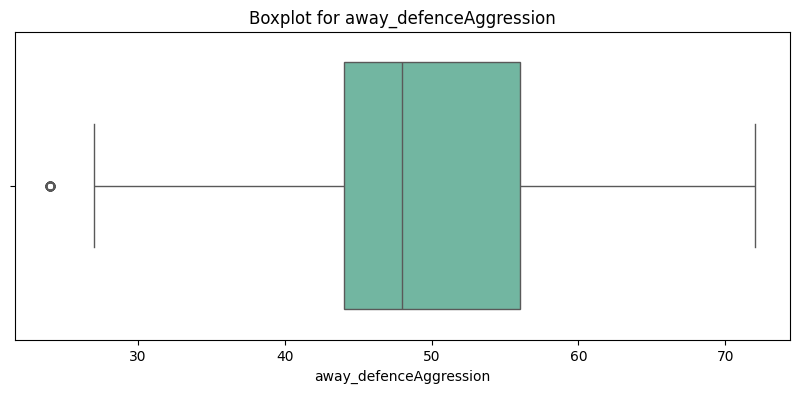

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


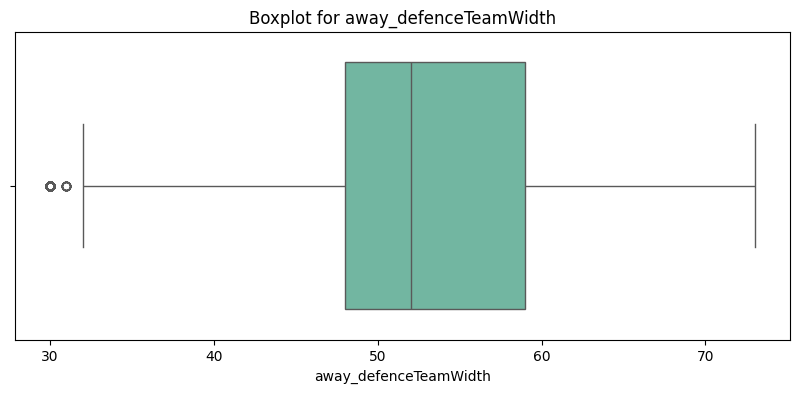

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


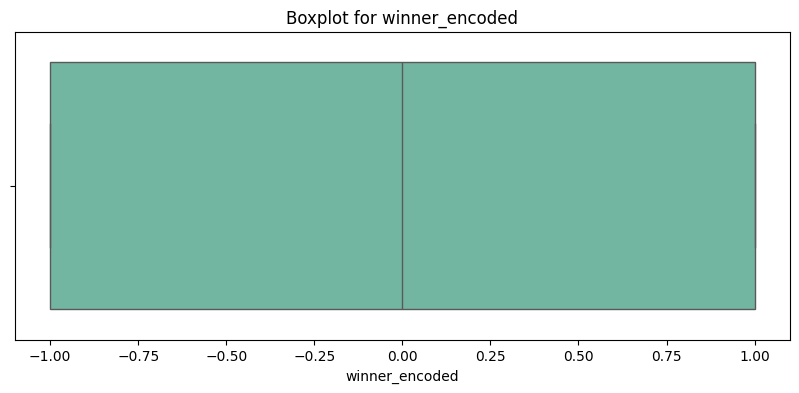

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


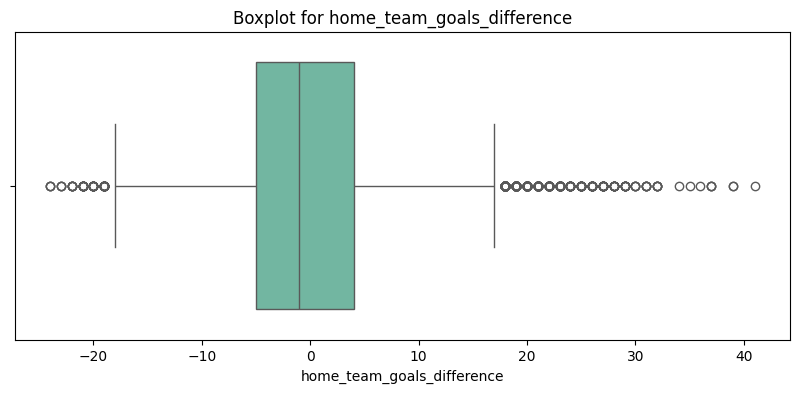

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


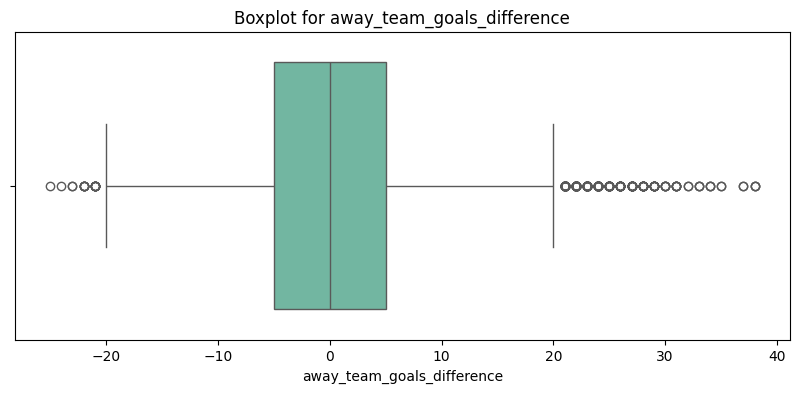

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


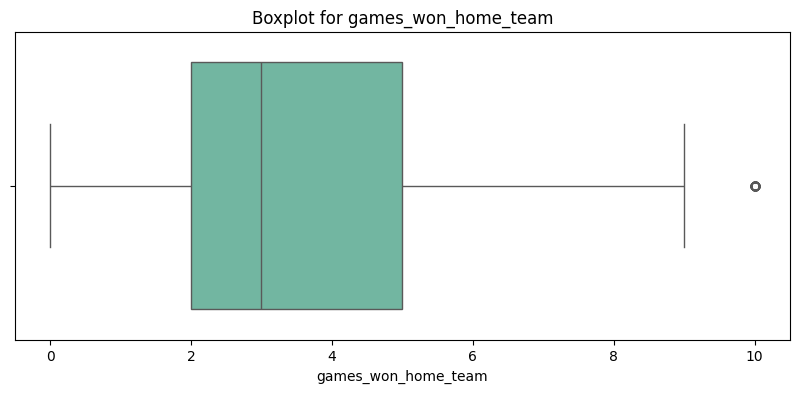

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


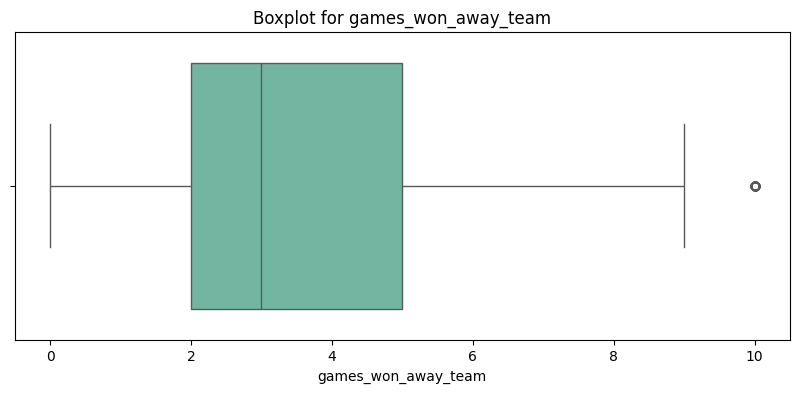

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


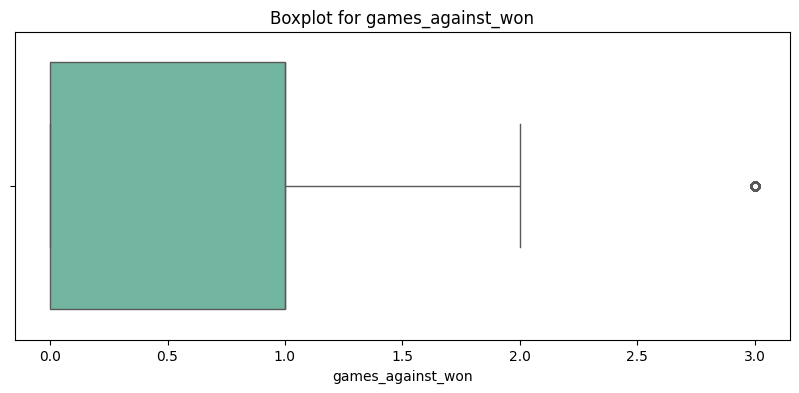

C:\Users\you14\AppData\Local\Temp\ipykernel_85888\2831555449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity


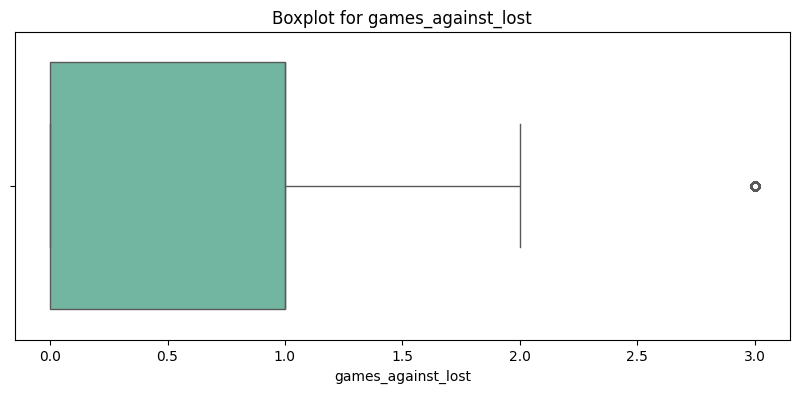

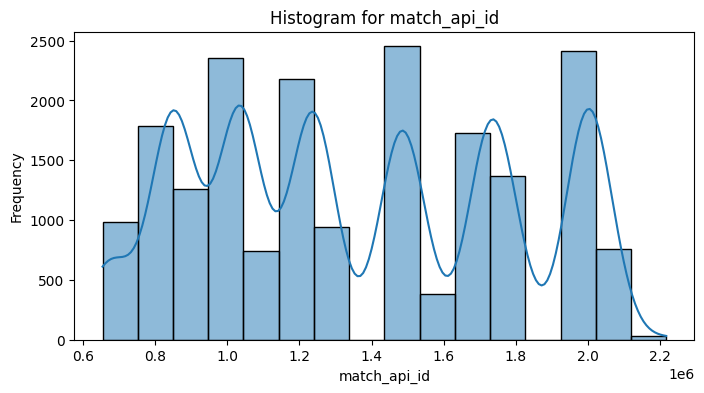

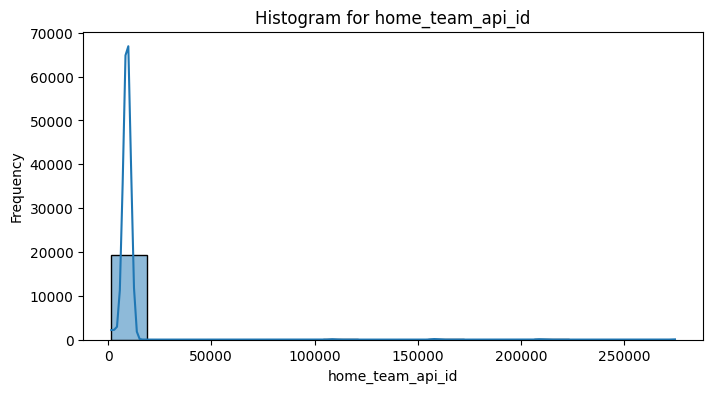

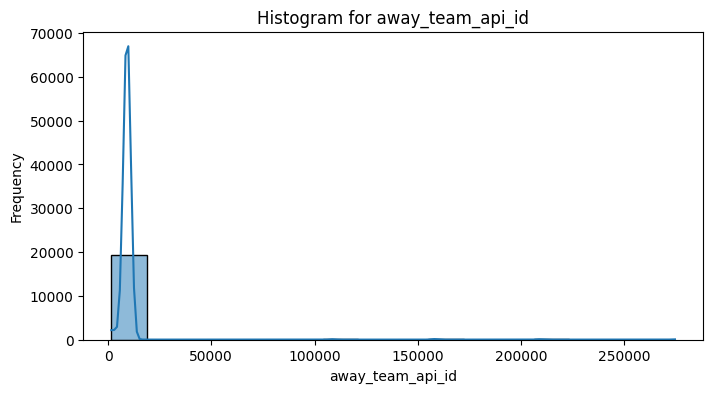

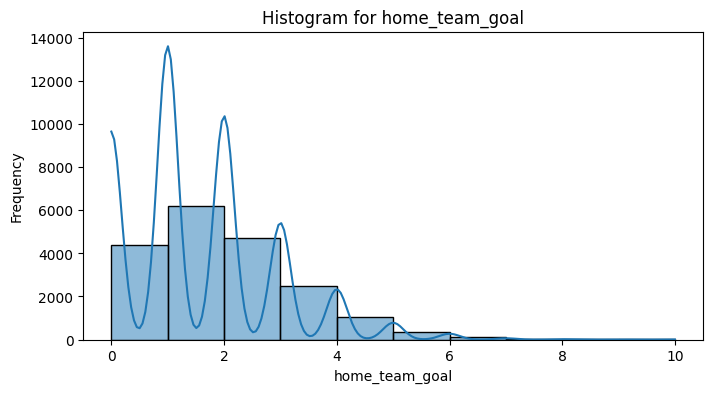

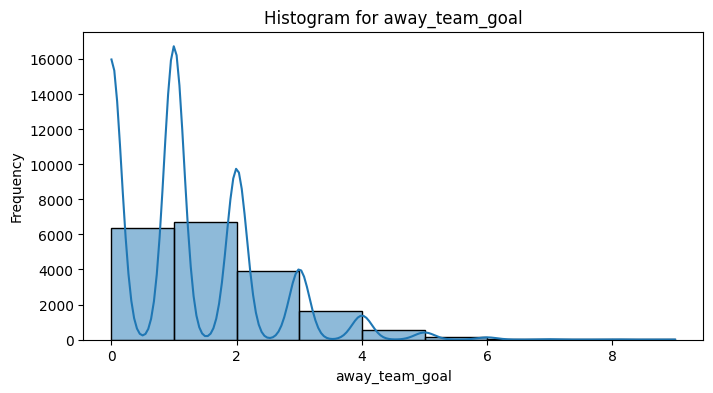

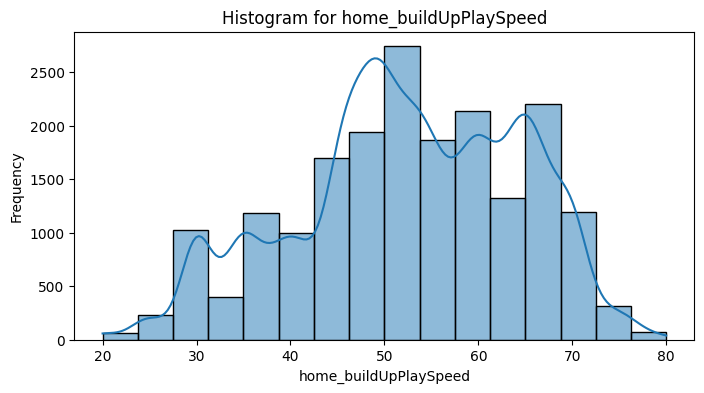

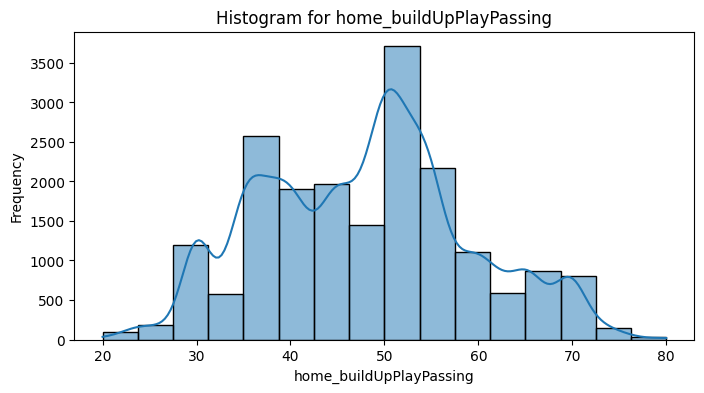

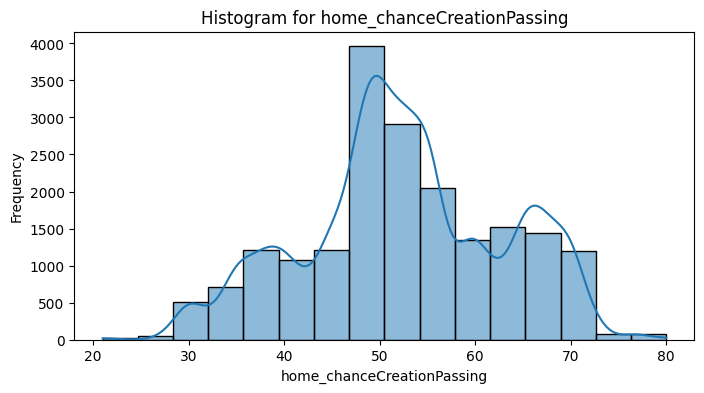

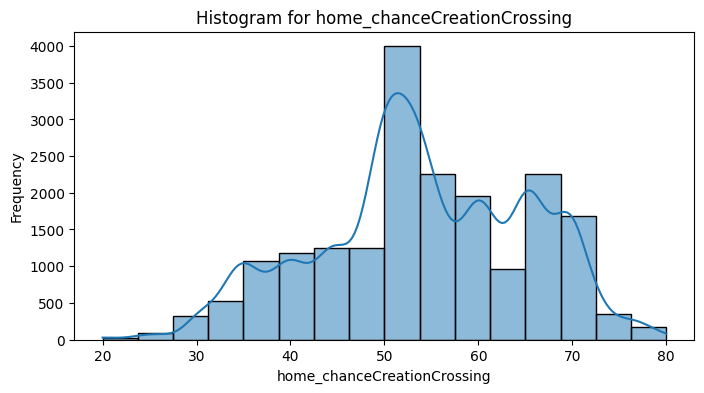

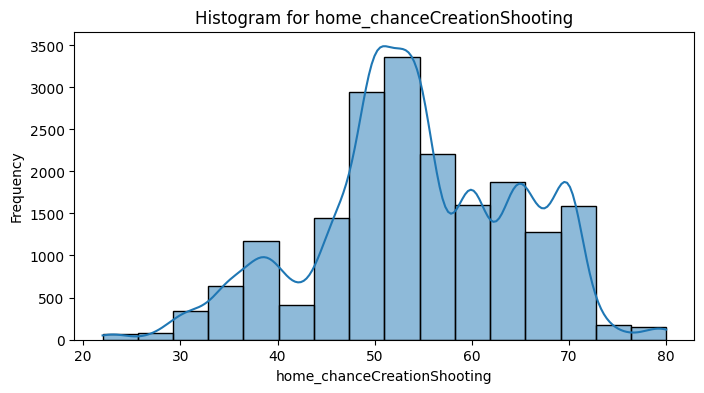

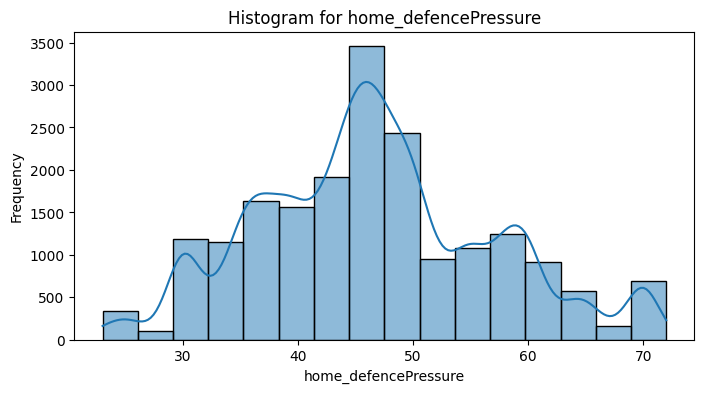

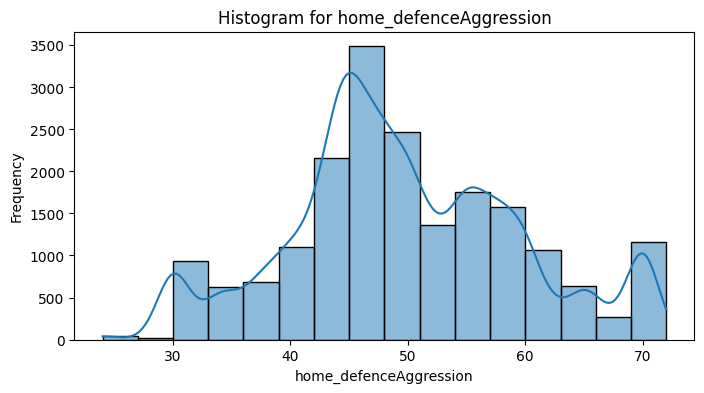

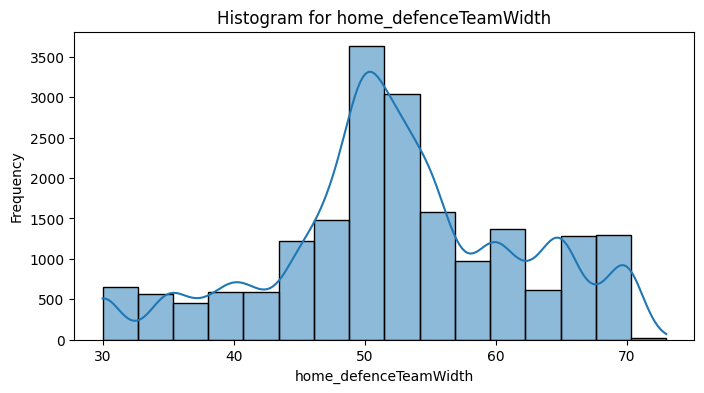

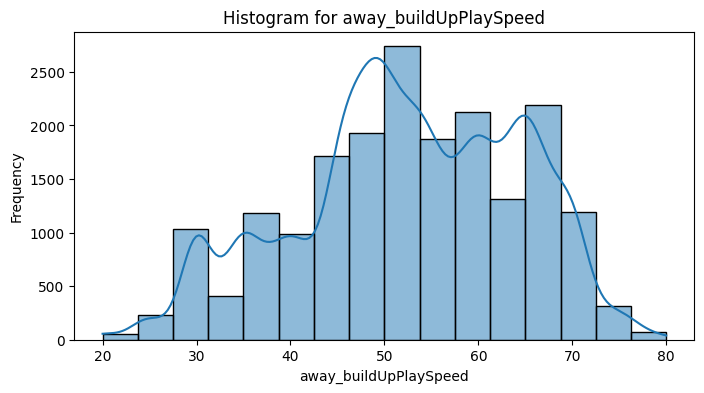

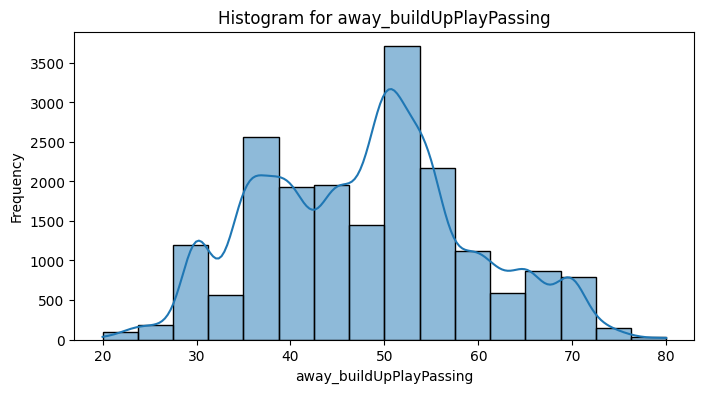

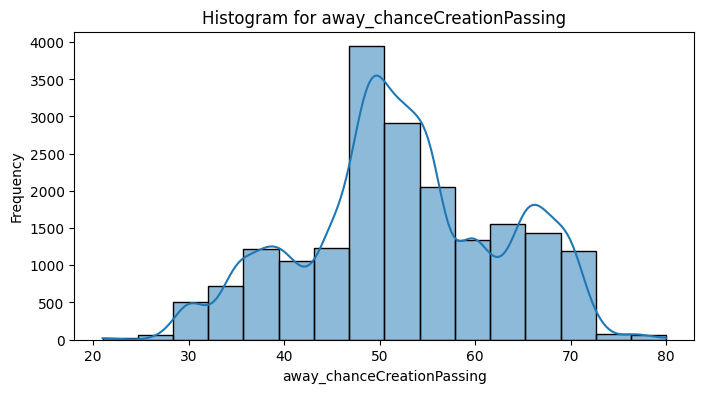

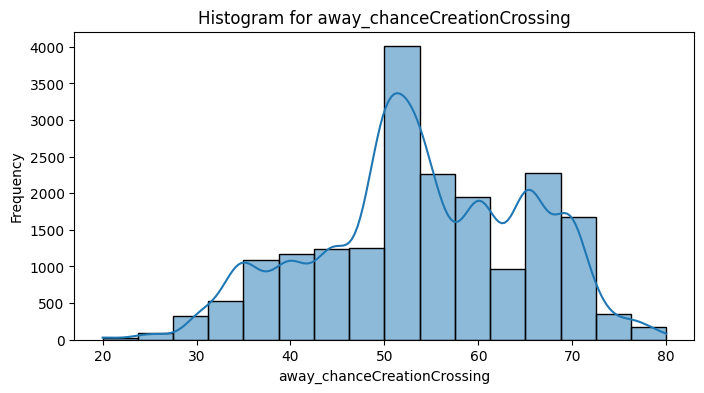

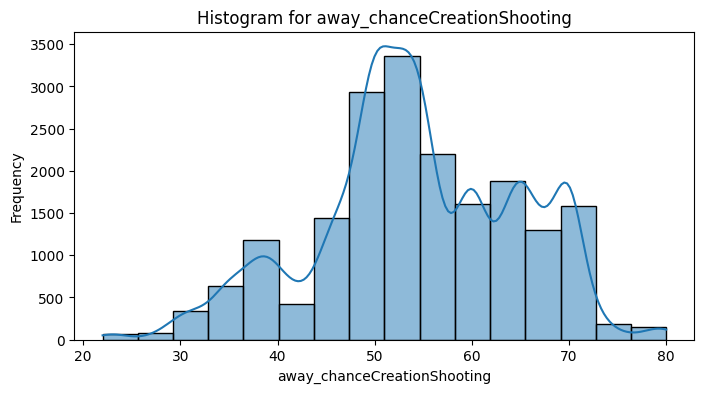

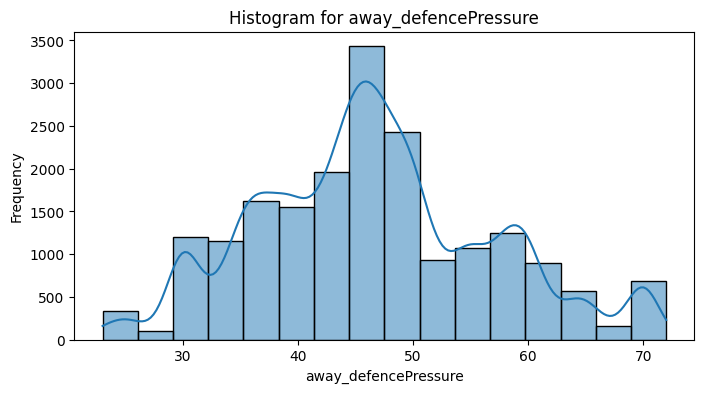

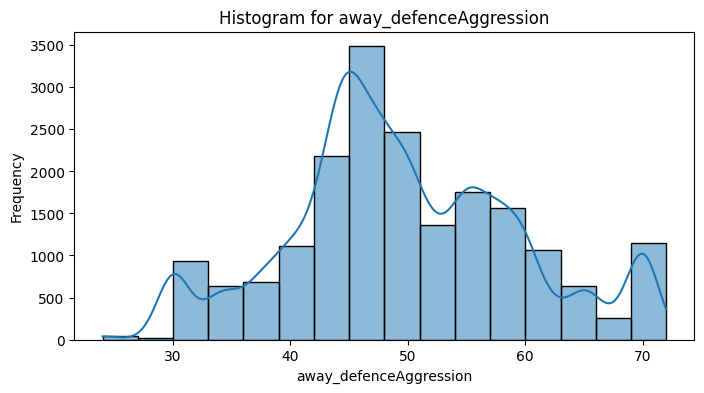

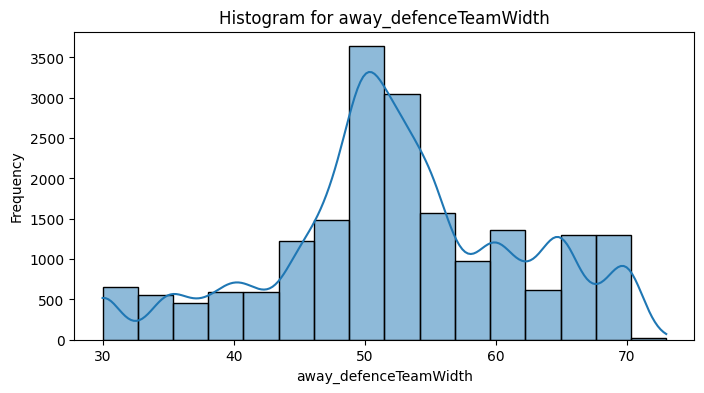

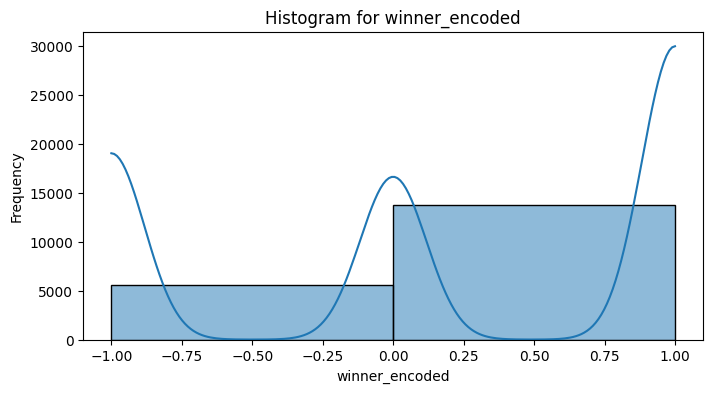

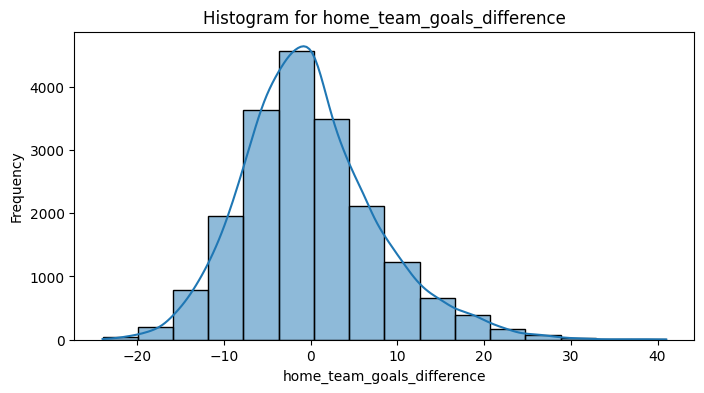

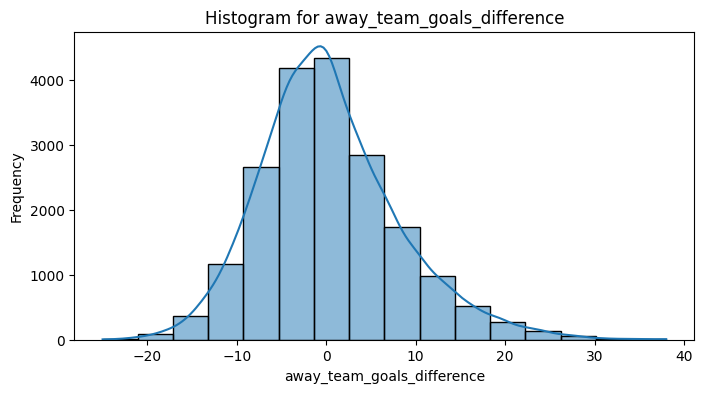

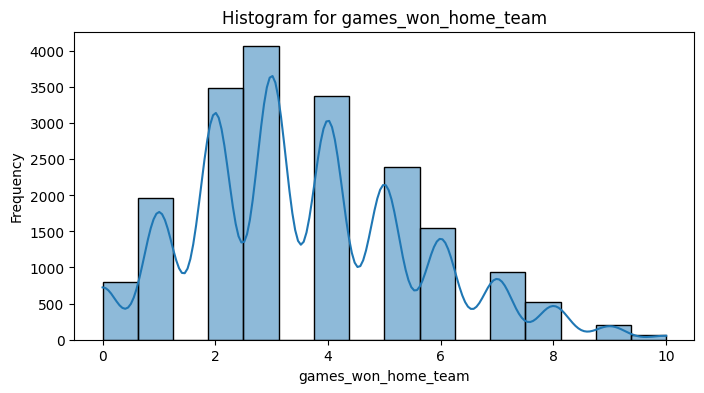

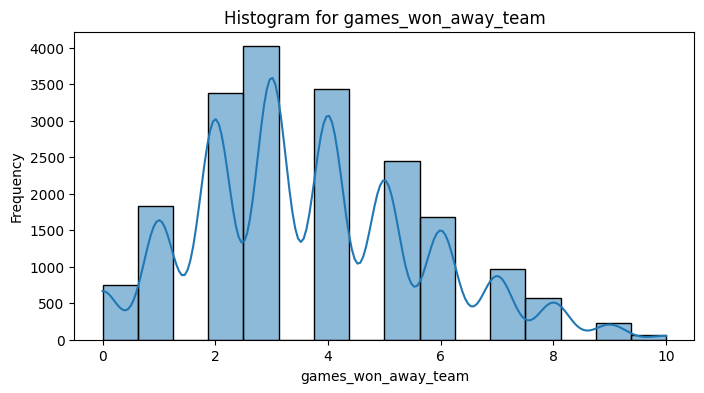

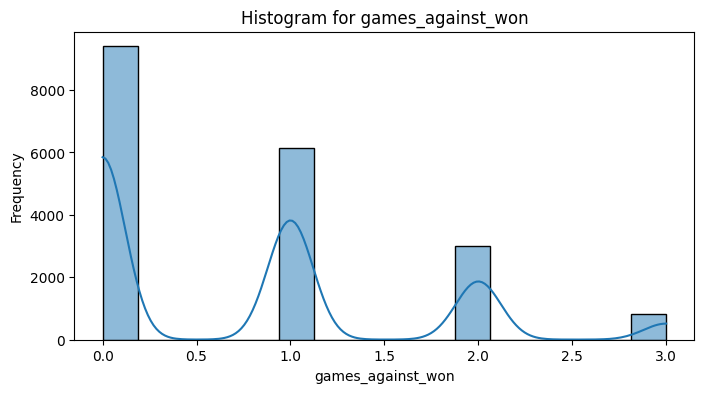

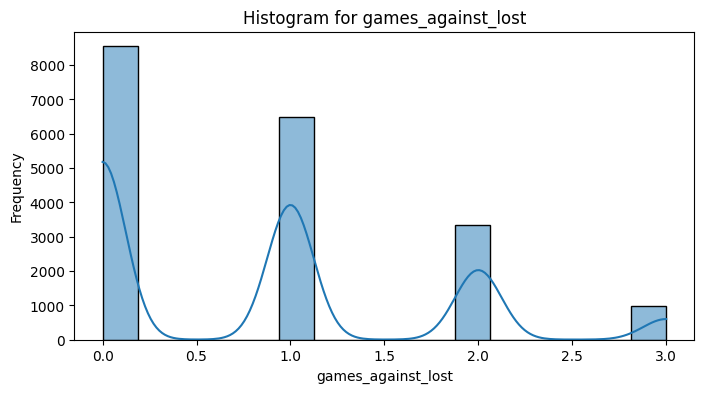

In [67]:
# Load the Excel file
# data_path = 'your_file.xlsx'  # Replace with your actual file path
df = df_match

# Display basic information about the data
print("Data Information:")
print(df.info())

# Visualize pair plots to show the relationship between columns
# Add a parameter to control the specific columns being plotted to handle large datasets efficiently
columns_to_plot = df.columns[:5]  # Replace with a list of specific columns or adjust as needed
sns.pairplot(df[columns_to_plot], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

# Identify outliers using boxplots with color palette for better clarity
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column], palette="Set2")  # Added color palette for visual clarity
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)  # Added label for clarity
    plt.show()

# Create histograms for each numerical column with dynamic bin adjustment
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    # Determine optimal bin size using Sturges' rule or an alternative
    bin_count = np.histogram_bin_edges(df[column].dropna(), bins='sturges').size - 1
    sns.histplot(df[column], kde=True, bins=bin_count)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [68]:
# wirte the data to a csv file
df_match.to_csv('final_data.csv', index=False)

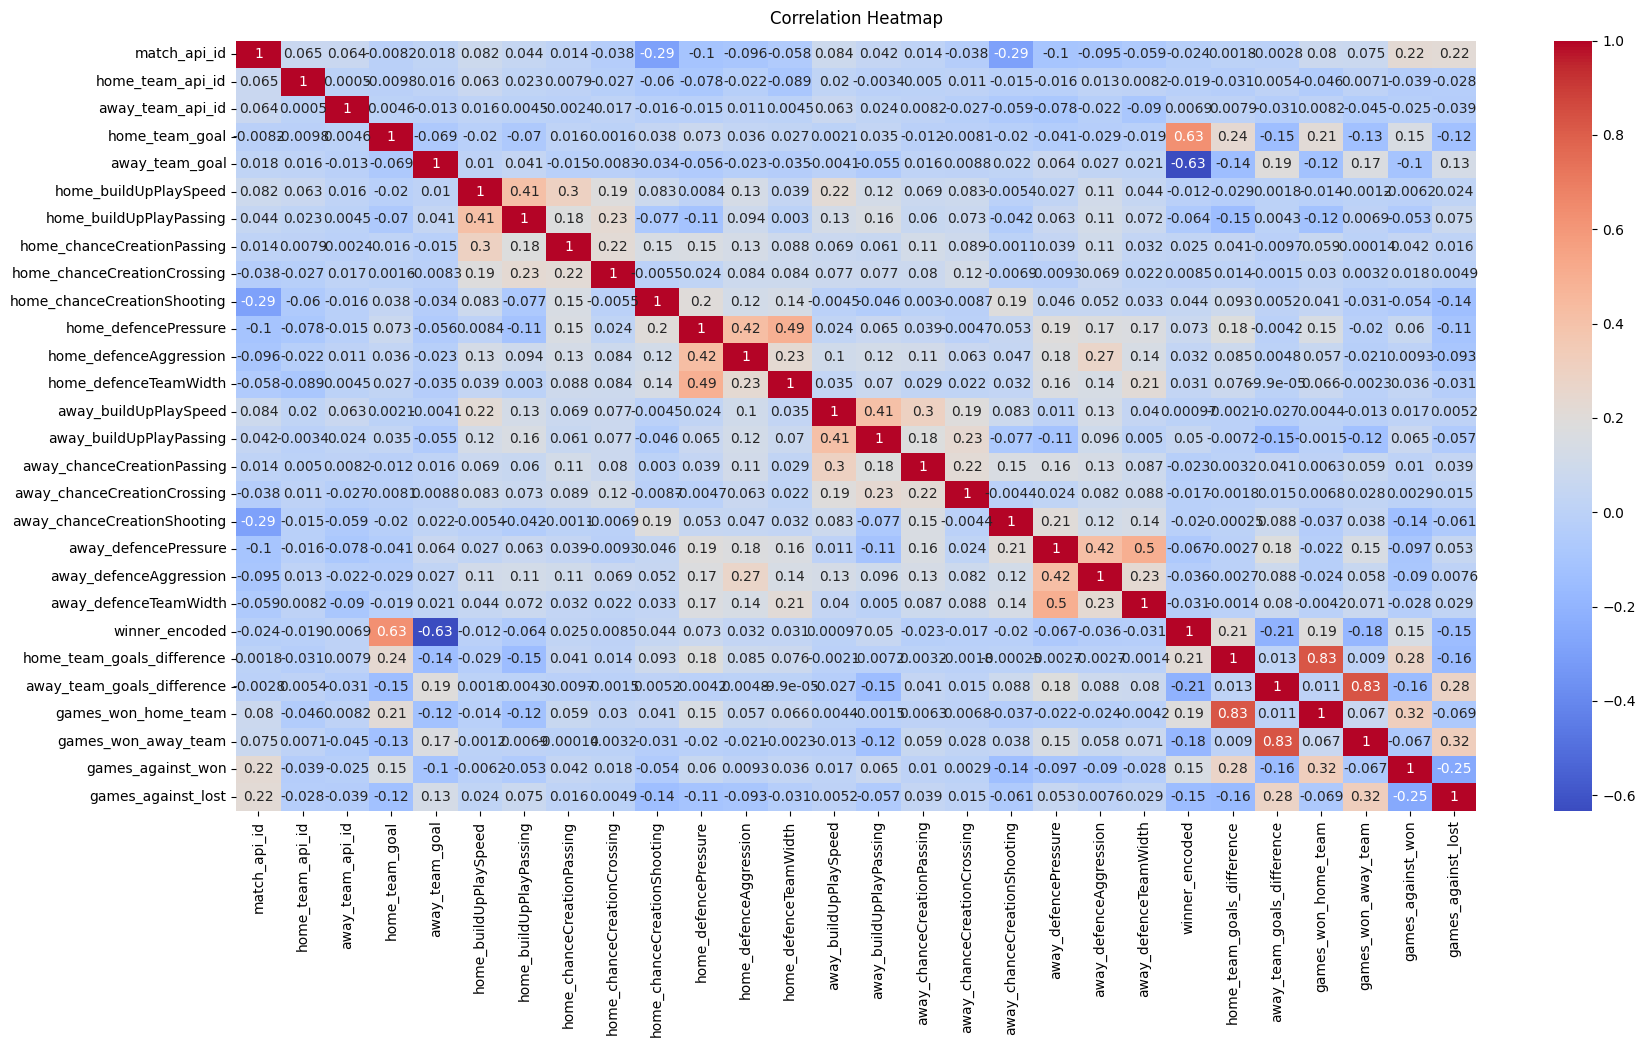

In [69]:
#find correlation between columns
#choose numeric columns to find correlation between them
df_match_numeric = df_match.select_dtypes(include=['float64', 'int64'])
#find correlation between columns
correlation = df_match_numeric.corr()
correlation
# Display the correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


In [70]:
# Define the columns to drop that are not needed as features to train the model
columns_to_drop = [
    'match_api_id', 'home_team_name', 'away_team_name', 'winner', 
    'winner_encoded', 'date', 'home_team_api_id', 'away_team_api_id', 
    'season', 'home_attribute_date', 'away_attribute_date','home_team_goal','away_team_goal']

target = df_match["winner_encoded"]

# Drop specified columns from the dataset
filtered_features = df_match.drop(columns=columns_to_drop, errors='ignore')

# Retain only numeric features
filtered_numeric_features = filtered_features.select_dtypes(include=["number"])

# Handle missing values in the filtered dataset
filtered_numeric_features = filtered_numeric_features.fillna(filtered_numeric_features.mean())

scaler = StandardScaler()
# Normalize the numeric features
filtered_numeric_features_scaled = scaler.fit_transform(filtered_numeric_features)

# Split the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    filtered_numeric_features_scaled, target, test_size=0.2, random_state=42
)

In [71]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_filtered)
y_test_encoded = label_encoder.transform(y_test_filtered)

# Define models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_filtered, y_train_encoded)  # Train the model
    y_pred = model.predict(X_test_filtered)  # Make predictions
    accuracy = accuracy_score(y_test_encoded, y_pred)  # Accuracy
    report = classification_report(y_test_encoded, y_pred)  # Classification Report
    results[model_name] = {"Accuracy": accuracy, "Report": report}

# Identify and print the best model
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['Accuracy']}")
print(f"Classification Report:\n{results[best_model_name]['Report']}")

c:\Users\you14\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Model: Gradient Boosting
Accuracy: 0.5001291655902868
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.37      0.41      1118
           1       0.27      0.01      0.02       988
           2       0.52      0.85      0.64      1765

    accuracy                           0.50      3871
   macro avg       0.42      0.41      0.36      3871
weighted avg       0.44      0.50      0.42      3871

